# Linear Regression 

In this notebook, a linear regression model will be implemented.

The code is adapted from Andrew Ng's 'Machine Learning Specialiation' course to accomplish the homework assignment. 


# Outline
- [ 1 - Import Packages](#1)
- [ 2 - Load the Data](#2)
- [ 3 - Main Functions](#3)
- [ 4 - Train the Agent](#5)
- [ 5 - Visualize the results](#4)

<a name="1"></a>
## 1 - Import Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

<a name="2"></a>
## 2 - Load the Data

In [15]:
x_train = np.array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])
y_train = np.array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.8214 ,
        1.8451 ,  4.2959 ,  7.2029 ,  1.9869 ,  0.14454,  9.0551 ,
        0.61705])

<a name="3"></a>
## 3 - Main Functions

In [5]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    total_cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2 
        total_cost = total_cost + cost 
        
    total_cost = 1 / (2*m) * total_cost

    return total_cost

In [12]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw = dj_dw + (f_wb - y[i]) * x[i]
        dj_db = dj_db + (f_wb - y[i]) 
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
        
    return dj_dw, dj_db

In [10]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

<a name="4"></a>
## 4 - Train the Agent

In [16]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


<a name="5"></a>
## 5 - Visualize the results

Text(0.5, 0, 'Xs')

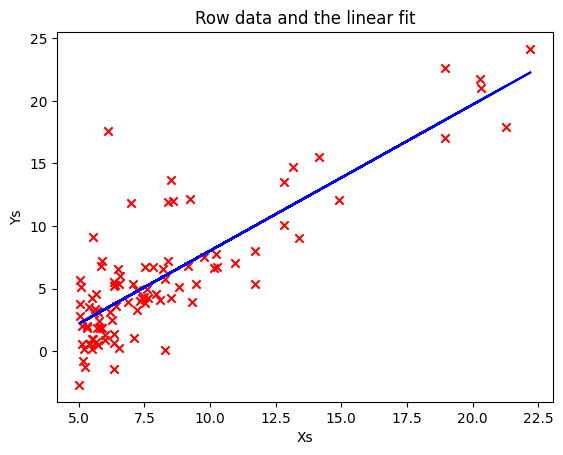

In [19]:
# calculate the predictions
m = x_train.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = w * x_train[i] + b
    
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")
# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Row data and the linear fit")
# Set the y-axis label
plt.ylabel('Ys')
# Set the x-axis label
plt.xlabel('Xs')